<a href="https://colab.research.google.com/github/xavoliva6/dpfl_pytorch/blob/main/experiments/exp_FEMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiments on FEMNIST

**Colab Support**<br/>
Only run the following lines if you want to run the code on Google Colab

In [1]:
# Enable access to files stored in Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
% cd /content/gdrive/My Drive/OPT4ML/src

/content/gdrive/My Drive/OPT4ML/src


# Main

In [3]:
# Install necessary requirements
!pip install -r ../requirements.txt

     |████████████████████████████████| 15.3MB 198kB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 9.9MB 48.2MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: requests 2.23.0
    Uninstalling requests-2

In [4]:
# Make sure cuda support is available
import torch

if torch.cuda.is_available():
    device_name = "cuda:0"
else:
    device_name = "cpu"
print("device_name: {}".format(device_name))
device = torch.device(device_name)

device_name: cuda:0


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
import warnings

warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

### First experiment : impact of federated learning

In [11]:
LR = 0.01
EPOCHS = 1
NR_TRAINING_ROUNDS = 30
BATCH_SIZE = 128

RANGE_NR_CLIENTS = [1,5,10]

In [17]:
experiment_losses, experiment_accs = [], []
for nr_clients in RANGE_NR_CLIENTS:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='FEMNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=False,
        epsilon=None,
        max_grad_norm=None,
        noise_multiplier=None,
        is_parallel=True,
        device=device,
        verbose='server')

    test_losses, test_accs = server.train()
    
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### Number of clients : 1 ###


--- Configuration ---
nr_clients: 1
nr_training_rounds: 30
data: FEMNIST
epochs: 1
lr: 0.01
batch_size: 128
is_private: False
epsilon: None
max_grad_norm: None
noise_multiplier: None
is_parallel: True
device: <class 'torch.device'>
verbose: server
--- Loading Data ---
Loaded Test Data
Loaded Training Data
--- Training ---
Round 1, test_loss: 171.962, test_acc: 0.324
Round 2, test_loss: 64.875, test_acc: 0.796
Round 3, test_loss: 34.386, test_acc: 0.875
Round 4, test_loss: 24.282, test_acc: 0.906
Round 5, test_loss: 19.420, test_acc: 0.925
Round 6, test_loss: 16.149, test_acc: 0.941
Round 7, test_loss: 13.640, test_acc: 0.951
Round 8, test_loss: 12.638, test_acc: 0.955
Round 9, test_loss: 10.949, test_acc: 0.962
Round 10, test_loss: 9.921, test_acc: 0.966
Round 11, test_loss: 9.295, test_acc: 0.968
Round 12, test_loss: 9.074, test_acc: 0.970
Round 13, test_loss: 8.207, test_acc: 0.974
Round 14, test_loss: 7.934, test_acc: 0.974
Round 15, test_loss: 7.849,

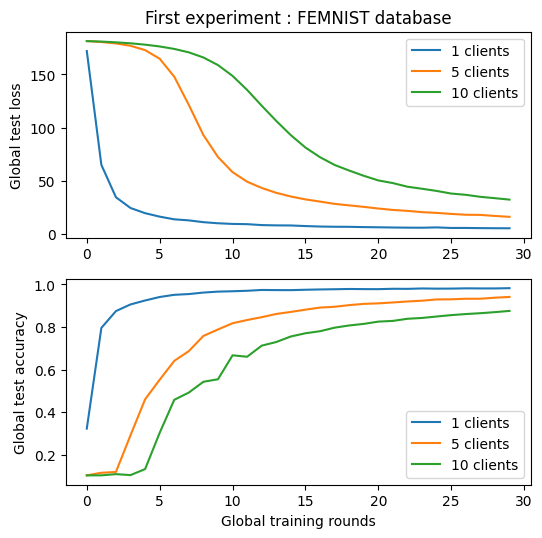

In [18]:
names = [f'{i} clients' for i in RANGE_NR_CLIENTS]
title = 'First experiment : FEMNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("FEMNIST_exp1.pdf")

### Second experiment : impact of differential privacy

In [19]:
NR_CLIENTS = 10
NR_TRAINING_ROUNDS = 30
EPOCHS = 1
LR = 0.01
BATCH_SIZE = 128

MAX_GRAD_NORM = 1.2
NOISE_MULTIPLIER = None

RANGE_EPSILON = [10,50,100]

In [20]:
experiment_losses, experiment_accs = [], []
for epsilon in RANGE_EPSILON:
    print(f"### epsilon : {epsilon} ###\n\n")
    server = Server(
        nr_clients=NR_CLIENTS,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='FEMNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=True,
        epsilon=epsilon,
        max_grad_norm=MAX_GRAD_NORM,
        noise_multiplier=NOISE_MULTIPLIER,
        is_parallel=True,
        device=device,
        verbose='server')

    test_losses, test_accs = server.train()
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### epsilon : 10 ###


--- Configuration ---
nr_clients: 10
nr_training_rounds: 30
data: FEMNIST
epochs: 1
lr: 0.01
batch_size: 128
is_private: True
epsilon: 10
max_grad_norm: 1.2
noise_multiplier: None
is_parallel: True
device: <class 'torch.device'>
verbose: server
--- Loading Data ---
Loaded Test Data
Loaded Training Data
--- Training ---
Round 1, test_loss: 181.922, test_acc: 0.107
Round 2, test_loss: 181.883, test_acc: 0.099
Round 3, test_loss: 181.827, test_acc: 0.156
Round 4, test_loss: 181.799, test_acc: 0.125
Round 5, test_loss: 181.767, test_acc: 0.117
Round 6, test_loss: 181.729, test_acc: 0.123
Round 7, test_loss: 181.700, test_acc: 0.108
Round 8, test_loss: 181.667, test_acc: 0.105
Round 9, test_loss: 181.631, test_acc: 0.105
Round 10, test_loss: 181.582, test_acc: 0.105
Round 11, test_loss: 181.532, test_acc: 0.105
Round 12, test_loss: 181.495, test_acc: 0.105
Round 13, test_loss: 181.458, test_acc: 0.105
Round 14, test_loss: 181.444, test_acc: 0.105
Round 15, test_loss: 

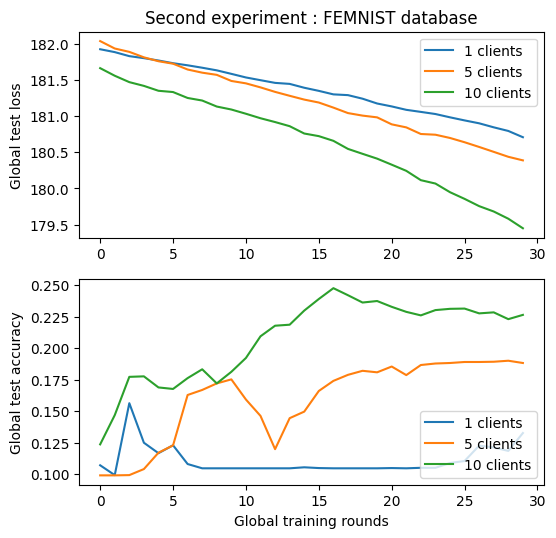

In [21]:
names = [f'{i} clients' for i in RANGE_NR_CLIENTS]
title = 'Second experiment : FEMNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("FEMNIST_exp2.pdf")